In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
class UCB:
    def __init__(self, num_arms, c=1):
        """
        Initialize the UCB algorithm for multi-armed bandits.

        Parameters:
        - num_arms: Number of arms in the bandit problem.
        - c: Exploration parameter (higher values encourage exploration).
        """
        self.num_arms = num_arms
        self.c = c
        self.counts = np.zeros(num_arms)  # Number of times each arm was pulled
        self.mean_rewards = np.zeros(num_arms)  # Mean rewards for each arm
        self.total_rewards = 0  # Total cumulative rewards

    def select_arm(self, t):
        """
        Select an arm to pull based on the UCB formula.

        Parameters:
        - t: Current round number (1-indexed).

        Returns:
        - chosen_arm: The index of the arm to pull.
        """
        if t <= self.num_arms:
            # Pull each arm once in the first `num_arms` rounds
            return t - 1
        else:
            # Calculate UCB for each arm
            confidence_bounds = (
                self.mean_rewards
                + self.c * np.sqrt(2 * np.log(t) / (self.counts + 1e-8))  # Add small epsilon to avoid division by zero
            )
            return np.argmax(confidence_bounds)

    def update(self, chosen_arm, reward):
        """
        Update the statistics for the chosen arm after observing the reward.

        Parameters:
        - chosen_arm: The index of the chosen arm.
        - reward: The observed reward from the chosen arm.
        """
        # Update counts and mean reward for the chosen arm
        self.counts[chosen_arm] += 1
        self.mean_rewards[chosen_arm] += (reward - self.mean_rewards[chosen_arm]) / self.counts[chosen_arm]
        self.total_rewards += reward



In [5]:
# Simulation
def run_simulation(num_arms, num_rounds, true_means, c=1):
    """
    Simulate the UCB algorithm for MAB.

    Parameters:
    - num_arms: Number of arms.
    - num_rounds: Total number of rounds.
    - true_means: True reward means for each arm.
    - c: Exploration parameter.

    Returns:
    - cumulative_rewards: List of cumulative rewards at each step.
    - regret: List of regret at each step.
    - counts: Number of times each arm was pulled.
    """
    ucb = UCB(num_arms, c)
    cumulative_rewards = []
    regret = []

    optimal_reward = max(true_means)
    total_reward = 0

    for t in range(1, num_rounds + 1):
        # Select an arm and get a reward
        chosen_arm = ucb.select_arm(t)
        reward = np.random.binomial(1, true_means[chosen_arm])
        ucb.update(chosen_arm, reward)

        # Track cumulative rewards and regret
        total_reward += reward
        cumulative_rewards.append(total_reward)
        regret.append(t * optimal_reward - total_reward)

    return cumulative_rewards, regret, ucb.counts


In [6]:
# Parameters
num_arms = 5
num_rounds = 1000
true_means = [0.1, 0.3, 0.5, 0.7, 0.9]
c = 1

# Run the simulation
cumulative_rewards, regret, counts = run_simulation(num_arms, num_rounds, true_means, c)

# Results
print("True Reward Means:", true_means)
print("Arm Selection Counts:", counts)
print("Total Cumulative Reward:", cumulative_rewards[-1])
print("Final Regret:", regret[-1])



True Reward Means: [0.1, 0.3, 0.5, 0.7, 0.9]
Arm Selection Counts: [ 15.  35.  55. 134. 761.]
Total Cumulative Reward: 822
Final Regret: 78.0


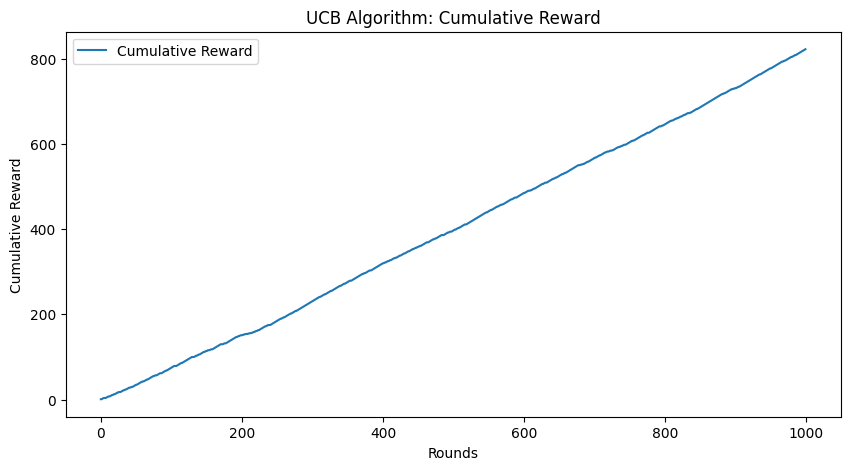

In [7]:
# Plot Cumulative Rewards
plt.figure(figsize=(10, 5))
plt.plot(cumulative_rewards, label="Cumulative Reward")
plt.xlabel("Rounds")
plt.ylabel("Cumulative Reward")
plt.title("UCB Algorithm: Cumulative Reward")
plt.legend()
plt.show()


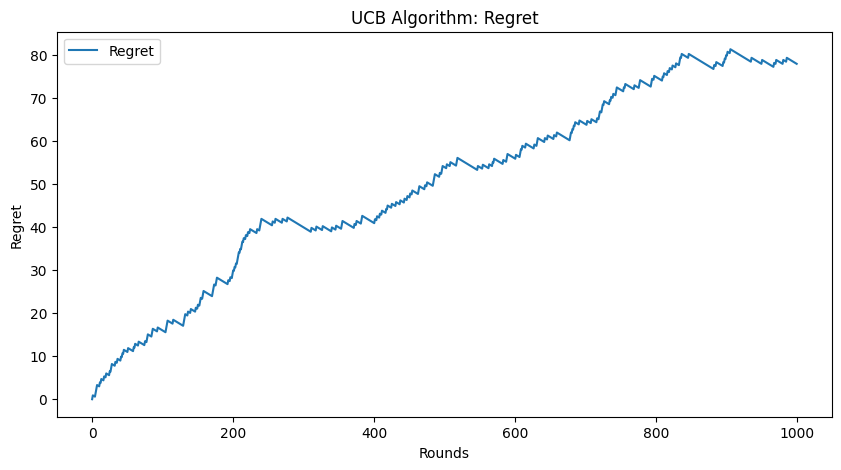

In [8]:
# Plot Regret
plt.figure(figsize=(10, 5))
plt.plot(regret, label="Regret")
plt.xlabel("Rounds")
plt.ylabel("Regret")
plt.title("UCB Algorithm: Regret")
plt.legend()
plt.show()

In [1]:
# Putting all together

True Reward Means: [0.1, 0.3, 0.5, 0.7, 0.9]
Arm Selection Counts: [ 14.  29.  46. 108. 803.]
Total Cumulative Reward: 814
Final Regret: 86.0


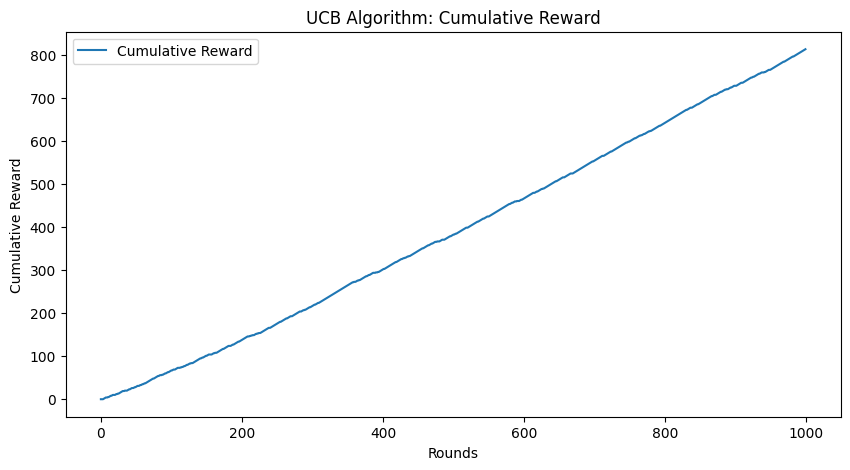

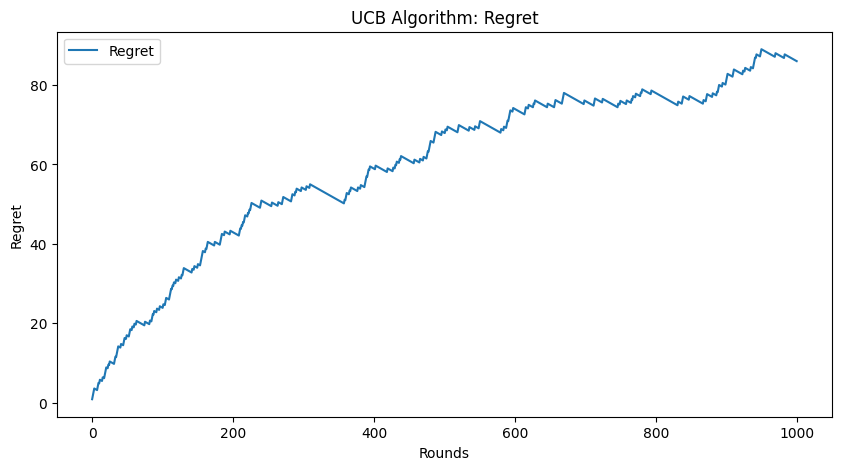

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class UCB:
    def __init__(self, num_arms, c=1):
        """
        Initialize the UCB algorithm for multi-armed bandits.

        Parameters:
        - num_arms: Number of arms in the bandit problem.
        - c: Exploration parameter (higher values encourage exploration).
        """
        self.num_arms = num_arms
        self.c = c
        self.counts = np.zeros(num_arms)  # Number of times each arm was pulled
        self.mean_rewards = np.zeros(num_arms)  # Mean rewards for each arm
        self.total_rewards = 0  # Total cumulative rewards

    def select_arm(self, t):
        """
        Select an arm to pull based on the UCB formula.

        Parameters:
        - t: Current round number (1-indexed).

        Returns:
        - chosen_arm: The index of the arm to pull.
        """
        if t <= self.num_arms:
            # Pull each arm once in the first `num_arms` rounds
            return t - 1
        else:
            # Calculate UCB for each arm
            confidence_bounds = (
                self.mean_rewards
                + self.c * np.sqrt(2 * np.log(t) / (self.counts + 1e-8))  # Add small epsilon to avoid division by zero
            )
            return np.argmax(confidence_bounds)

    def update(self, chosen_arm, reward):
        """
        Update the statistics for the chosen arm after observing the reward.

        Parameters:
        - chosen_arm: The index of the chosen arm.
        - reward: The observed reward from the chosen arm.
        """
        # Update counts and mean reward for the chosen arm
        self.counts[chosen_arm] += 1
        self.mean_rewards[chosen_arm] += (reward - self.mean_rewards[chosen_arm]) / self.counts[chosen_arm]
        self.total_rewards += reward

# Simulation
def run_simulation(num_arms, num_rounds, true_means, c=1):
    """
    Simulate the UCB algorithm for MAB.

    Parameters:
    - num_arms: Number of arms.
    - num_rounds: Total number of rounds.
    - true_means: True reward means for each arm.
    - c: Exploration parameter.

    Returns:
    - cumulative_rewards: List of cumulative rewards at each step.
    - regret: List of regret at each step.
    - counts: Number of times each arm was pulled.
    """
    ucb = UCB(num_arms, c)
    cumulative_rewards = []
    regret = []

    optimal_reward = max(true_means)
    total_reward = 0

    for t in range(1, num_rounds + 1):
        # Select an arm and get a reward
        chosen_arm = ucb.select_arm(t)
        reward = np.random.binomial(1, true_means[chosen_arm])
        ucb.update(chosen_arm, reward)

        # Track cumulative rewards and regret
        total_reward += reward
        cumulative_rewards.append(total_reward)
        regret.append(t * optimal_reward - total_reward)

    return cumulative_rewards, regret, ucb.counts

# Parameters
num_arms = 5
num_rounds = 1000
true_means = [0.1, 0.3, 0.5, 0.7, 0.9]
c = 1

# Run the simulation
cumulative_rewards, regret, counts = run_simulation(num_arms, num_rounds, true_means, c)

# Results
print("True Reward Means:", true_means)
print("Arm Selection Counts:", counts)
print("Total Cumulative Reward:", cumulative_rewards[-1])
print("Final Regret:", regret[-1])

# Plot Cumulative Rewards
plt.figure(figsize=(10, 5))
plt.plot(cumulative_rewards, label="Cumulative Reward")
plt.xlabel("Rounds")
plt.ylabel("Cumulative Reward")
plt.title("UCB Algorithm: Cumulative Reward")
plt.legend()
plt.show()

# Plot Regret
plt.figure(figsize=(10, 5))
plt.plot(regret, label="Regret")
plt.xlabel("Rounds")
plt.ylabel("Regret")
plt.title("UCB Algorithm: Regret")
plt.legend()
plt.show()
